In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import matplotlib.gridspec as gridspec
os.environ["CUDA_VISIBLE_DEVICES"]="-1" 

In [2]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# 標準均勻分佈Xaiver初始化
# fan_in是輸入節點的數量,fan_out是輸出節點的數量
#def xavier_init(fan_in, fan_out, constant=1):
#    low = -constant * np.sqrt(6.0 / (fan_in + fan_out))
#    high = constant * np.sqrt(6.0 / (fan_in + fan_out))
#    return tf.random_uniform((fan_in ,fan_out),minval=low,maxval=high,dtype=tf.float32)

In [4]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [5]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [6]:
# 為生成器生成隨機噪聲
Z = tf.placeholder(tf.float32 ,shape=[None ,100] ,name='Z')

In [7]:
#生成器參數設定
G_W1 = tf.Variable(xavier_init([100 ,128]) ,name = 'G_W1')
G_b1 = tf.Variable(tf.zeros(shape = [128]) ,name = 'G_b1')
G_W2 = tf.Variable(xavier_init([128 ,784]) ,name = 'G_W2')
G_b2 = tf.Variable(tf.zeros(shape = [784]) ,name = 'G_b2')

theta_G = [G_W1 ,G_W2 ,G_b1 ,G_b2]

In [8]:
# 生成器 network
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z ,G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1 ,G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)
    
    return G_prob

In [9]:
# 為判別器準備的 MNIST 圖像輸入設定
X = tf.placeholder(tf.float32 ,shape=[None ,784] ,name = 'X')

In [10]:
# 判別器參數設定
D_W1 = tf.Variable(xavier_init([784 ,128]) ,name = 'D_W1')
D_b1 = tf.Variable(tf.zeros(shape=[128]) , name = 'D_b1')
D_W2 = tf.Variable(xavier_init([128 ,1]) ,name = 'D_W2')
D_b2 = tf.Variable(tf.zeros(shape=[1]) ,name = 'D_b2')
theta_D = [D_W1 ,D_W2 ,D_b1 ,D_b2]

In [11]:
# 判別器 network
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x ,D_W1) + D_b1)
    D_logit = tf.matmul(D_h1 ,D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)
    return D_prob ,D_logit

In [12]:
G_sample = generator(Z)

In [13]:
'''
from keras import optimizers

optimizers.SGD(lr = 0.0005)
'''

'\nfrom keras import optimizers\n\noptimizers.SGD(lr = 0.0005)\n'

In [14]:
D_real ,D_logit_real = discriminator(X)
D_fake ,D_logit_fake = discriminator(G_sample)

In [15]:
# GAN 原始論文中的 損失函數
D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
G_loss = -tf.reduce_mean(1. + tf.log(D_fake))

In [16]:
# 僅更新 D(X) 的參數 ,var_list = theta_D
D_solver = tf.train.AdamOptimizer().minimize(D_loss ,var_list = theta_D)

# 僅更新 G(X) 的參數 ,var_list = theta_G
G_solver = tf.train.AdamOptimizer().minimize(G_loss ,var_list = theta_G)

In [17]:
def sample_Z(m ,n):
    '''Uniform prior for G(Z)'''
    return np.random.uniform(-1. ,1. ,size=[m ,n])

In [18]:
batch_size = 128
Z_dim = 100

# tensorflow 2.0 後就沒 Session() 和 run()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
#下載 mnist 圖庫指令
mnist = input_data.read_data_sets('MNIST/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [20]:
mnist = input_data.read_data_sets('MNIST/',one_hot=True)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [21]:
#import os
 
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#config = tf.ConfigProto(allow_soft_placement = True)
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.5)
#config.gpu_options.allow_growth = True
 
#sess0 = tf.InteractiveSession(config = config)

Iter: 0
D loss: 1.207
G_loss: 3.376



C:\Users\Big data\.conda\envs\tensorflow\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\Big data\.conda\envs\tensorflow\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\Big data\.conda\envs\tensorflow\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\Big data\.conda\envs\tensorflow\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\Big data\.conda\envs\tensorflow\lib\site-packages\numpy\ma\core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Iter: 1000
D loss: nan
G_loss: nan

Iter: 2000
D loss: nan
G_loss: nan



KeyboardInterrupt: 

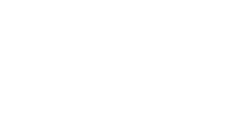

In [22]:
if not os.path.exists('e:/output/'):
    os.makedirs('e:/output/')

i = 0

for itr in range(30000):
    if itr % 100 == 0:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})

        fig = plot(samples)
        plt.savefig('e:/output/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)

    X_mb, _ = mnist.train.next_batch(batch_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(batch_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(batch_size, Z_dim)})

    if itr % 1000 == 0:
        print('Iter: {}'.format(itr))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()


In [ ]:
'''
for it in range(1000000):
    X_mb , _ = mnist.train.next_batch(batch_size)
    
    _, D_loss_curr = sess.run([D_solver ,D_loss] ,feed_dict = {X: X_mb ,Z:sample_Z(batch_size ,Z_dim)})
    
    _, G_loss_curr = sess.run([G_solver ,G_loss] ,feed_dict = {Z:sample_Z(batch_size ,Z_dim)})
''' 